# Практическая работа №1: Основы анализа и моделирования социальных сетей

Выполнил студент гр. 0382 Кондратов Юрий. Вариант №12

## Цель работы
Овладеть навыками работы с математическими пакетами для моделирования, визуализации и анализа социальных сетей.

## Основные теоретические положения

_Актор_ - дискретная социальная единица.

_Социальная сеть_ - объект,
представляющий собой конечный набор акторов и связей между ними.

_Социоматрица_ - матрица $X = \{x_{ij}\}$, где $x_{ij} = 1$,
 если вершины $i$ и $j$ смежны и 0 иначе.

_Алгоритм Фрюхтермана-Рейнгольдса_ - силовой алгоритм укладки сетей.
Идея алгоритма следующая: располагаем вершины в случайных местах экрана,
предполагаем, что на каждую вершину действует две силы:
$F_a(d) = \frac{d^2}{k}$ - сила притяжения, $F_r(d) = - \frac{k^2}{d}$ - сила отталкивания,
где $k = C\cdot\sqrt{area/\#V}$, а $d$ - расстояние между вершинами.
На каждой итерации в зависимости от действия сил вершины смещаются:
величину смещения определяет, в том числе, параметр "температуры",
изначально равный $0.1\cdot area$ и линейно уменьшающийся до нуля.

_Алгоритм Камада-Каваи_ - алгоритм укладки сетей,
основная цель которого состоит в обеспечении соответствия
геометрического расстояния между вершинами на экране и расстояния между ними в графе.
Идея состоит в том, чтобы соединить все вершины пружинами и найти минимум энергии получившейся системы.
Сила пружины рассчитывается как $k_{i,j} = K/d_{i,j}^2$,
где $K$ - некоторая константа, а $d_{i, j}$ - расстояние между вершинами.
Далее на каждой итерации выбирается вершина, которая имеет максимальное значение $\Delta_m = \sqrt{(\frac{\delta E}{\delta x_m})^2 + (\frac{\delta E}{\delta y_m})^2}$,
где $x_m$ и $y_m$ - координаты вершины. Смещение для координат ищется как решение системы дифференциальных уровнений.
Так происходит до тех пор, пока $\Delta_m$ больше заданного $\epsilon$.

_Размер сети_ - количество акторов в ней.

_Плотность сети_ - отношение количеств существующих и возможных связей. $\Delta = L/C_g^2$

_Диаметр сети_ - максимальное расстояние между вершинами.

_Коэффициент кластеризации_ - отношение количества замкнутых триад к обшему количеству триад.

_Средняя степень узлов_ - $\overline d = \frac{1}{g}\cdot \sum_{i = 1}^{g}d_i$, где $d_i$ - степень вершины $i$.

_Дисперсия_ - $\frac{1}{g}\cdot \sum_{i = 1}^{g}(d_i - \overline d)^2$.

_Нормированная центральность по степени_ - $C_D^{'} = d_i/(g-1)$.

_Нормированная центральность по близости_ - $C_C^{'} = (g-1)/\sum_{i=1}^g d_{ij}$.

_Нормированная центральность по посредничеству_ - $C_B^{'} = \sum_{s\neq v \neq t} \frac{\sigma_{st}(v)}{\sigma_{st}}$,
где $\sigma_{st}$ - количество кратчайших путей из $s$ в $t$, а $\sigma_{st}(v)$ - количество этих путей, проходящих через $v$.

_Нормированная центральность по информации_ - $C_I^{'}(n_i)=\frac{C_I(n_i)}{\sum_{i=1}^{g}C_I(n_i)}$, $C_I(n_i) = (C_{ii} - (T - 2R)/g)^{-1}$,
 где $C = A^{-1}$ ($A = \{a_{ij}\}$, $a_{ii} = 1 +$ степень вершины $i$, $a_{ij} = 0$, если $i$ и $j$ инцидентны и $1$ иначе),
 $T = tr C$, $R = \sum_{j=1}^{g}c_{ij}$.

_Централизация по степени_ - $C_D = \frac{1}{(g-1)(g-2)} \sum_{i=1}^{g}(C_D^{'}(n^*) - C_D^{'}(n_i))$,
где $C_D^{'}(n^*)$ - максимальная центральность по степени.

_Централизация по близости_ - $C_C = \frac{1}{(g-1)(g-2)/(2g - 3)} \sum_{i=1}^{g}(C_C^{'}(n^*) - C_C^{'}(n_i))$,
где $C_C^{'}(n^*)$ - максимальная центральность по близости.

_Централизация по посредничеству_ - $C_B = \frac{1}{g-1} \sum_{i=1}^{g}(C_B^{'}(n^*) - C_B^{'}(n_i))$,
где $С_B^{'}(n^*)$ - максимальная центральность по посредничеству.

_Нормированный престиж по степени_ - $P_D^{'}(n_i) = \frac{x_{+i}}{g-1}$,
где $x_{+i}$ - входная степень вершины.

_Престиж по близости_ $P_P(n_i) = \frac{\#I_i^2}{(g-1)\sum_{n_j \in I_i} d(n_j, n_i)}$,
где $I_i$ - множество вершин, из которых достижима вершины $i$.

## Постановка задачи
С помощью математических пакетов и соответствующих библиотек провести анализ заданных социальных сетей вычислить описательные характеристики. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

0. Импортируем библиотеки.

In [1]:
import pandas as pd
import networkx as nx

import warnings
warnings.filterwarnings("ignore")

ModuleNotFoundError: No module named 'pandas'

1. Из файла florentine_marital.csv (для чётных вариантов) извлечь социоматрицу с помощью соответствующих функций.
 Вывести полученную социоматрицу на экран.

In [158]:
sm = pd.read_csv('data/florentine_marital.csv', skiprows=2, header=None, delimiter=', ', engine='python')
sm

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1
7,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
8,1,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1
9,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


2. Преобразовать социоматрицу в список рёбер. Вывести первые 5 элементов списка рёбер

In [159]:
nx.to_pandas_edgelist(nx.from_pandas_adjacency(sm)).head()

,source,target,weight
0,0,8,1
1,1,5,1
2,1,6,1
3,1,8,1
4,2,4,1


3. Присвоить имена столбцам и строкам социоматрицы (имена – первая строка в csv-файле после комментариев).

In [160]:
names = pd.read_csv('data/florentine_marital.csv', skiprows=1, nrows=1, delimiter=', ', engine='python').columns
sm.columns = names
sm.index = names
sm

,Acciaiuoli,Albizzi,Barbadori,Bischeri,Castellani,Ginori,Guadagni,Lamberteschi,Medici,Pazzi,Peruzzi,Pucci,Ridolfi,Salviati,Strozzi,Tornabuoni
Acciaiuoli,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
Albizzi,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0
Barbadori,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
Bischeri,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
Castellani,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
Ginori,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Guadagni,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1
Lamberteschi,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
Medici,1,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1
Pazzi,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


4. С помощью соответствующих функций по полученной социоматрице построить ненаправленную сеть.
Объяснить параметры, передаваемые в функцию.

In [161]:
net = nx.from_pandas_adjacency(sm)

> Объяснение параметров: в функцию передаётся единственный параметр - социоматрица, по которой строится сеть

5. Отобразить сеть с помощью алгоритмов укладки Фрюхтермана–
Рейнгольда и Камада–Каваи. Объяснить, в чём различие между
алгоритмами и укладками.

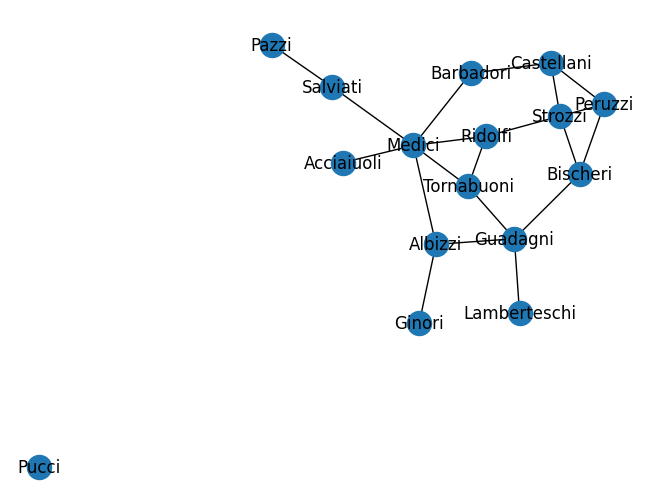

In [162]:
# Отрисовка на основе spring_layout, в котором используется алгоритм Фрюхтермана–Рейнгольда
# (см. исходный код https://networkx.org/documentation/stable/_modules/networkx/drawing/layout.html#spring_layout)
nx.draw_spring(net, with_labels=True)

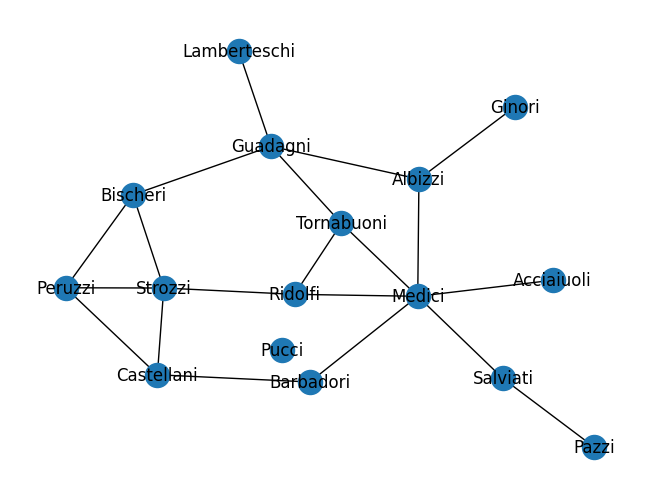

In [163]:
nx.draw_kamada_kawai(net, with_labels=True)

6. Вывести «описательную сводку» сети.

In [164]:
print(nx.info(net), '\n')
for name in names:
    print(nx.info(net, name), '\n')

Graph with 16 nodes and 20 edges 

Node Acciaiuoli has the following properties:
Degree: 1
Neighbors: Medici 

Node Albizzi has the following properties:
Degree: 3
Neighbors: Ginori Guadagni Medici 

Node Barbadori has the following properties:
Degree: 2
Neighbors: Castellani Medici 

Node Bischeri has the following properties:
Degree: 3
Neighbors: Guadagni Peruzzi Strozzi 

Node Castellani has the following properties:
Degree: 3
Neighbors: Barbadori Peruzzi Strozzi 

Node Ginori has the following properties:
Degree: 1
Neighbors: Albizzi 

Node Guadagni has the following properties:
Degree: 4
Neighbors: Albizzi Bischeri Lamberteschi Tornabuoni 

Node Lamberteschi has the following properties:
Degree: 1
Neighbors: Guadagni 

Node Medici has the following properties:
Degree: 6
Neighbors: Acciaiuoli Albizzi Barbadori Ridolfi Salviati Tornabuoni 

Node Pazzi has the following properties:
Degree: 1
Neighbors: Salviati 

Node Peruzzi has the following properties:
Degree: 3
Neighbors: Bischer

7. Вычислить «пятичисловую сводку» сети:

(a) Вычислить размер сети.

In [165]:
g = net.number_of_nodes()
g

16

(b) Вычислить плотность сети вручную и с помощью соответствующей функции. Сделать выводы.

$\Delta = \frac{L}{C_g^2} = \frac{20}{8\cdot15} = \frac{1}{6} = 0.1666...$

In [166]:
nx.density(net)

0.16666666666666666

> Вывод: если взять две флорентийские семьи,
> то с вероятностью 17% они будут соединены брачной связью.

(c) Определить число компонент в сети по графику.
Подтвердить свои догадки с помощью соответствующей функции.
Сделать выводы.

На графике отчётливо видно две компоненты: семья Pucci и все остальные.

In [167]:
nx.number_connected_components(net)

2

> Вывод: все семьи кроме Pucci имели хотя бы одну брачную связь с другими семьями.

(d) Вычислить диаметр сети. Сделать выводы.

In [168]:
max(nx.diameter(nx.subgraph(net, component)) for component in nx.connected_components(net))

5

> Вывод: самая длинная из кратчайших цепочка из брачных связей,
> соединяющая две семьи, имеет длину 5.

(e) Вычислить коэффициент кластеризации. Сделать выводы.

In [169]:
nx.transitivity(net)

0.19148936170212766

> Вывод: если семья $A$ имеет брачную связь с семьёй $B$,
> а семья $B$ с семьёй $C$, то с вероятностью 20% $A$ имеет брачную связь с $C$.

8. Вычислить среднюю степень узлов и дисперсию. Сделать выводы.

In [170]:
avg_deg = sum(deg for _, deg in net.degree) / net.number_of_nodes()
disp = sum((deg - avg_deg) ** 2 for _, deg in net.degree) / net.number_of_nodes()
avg_deg, disp

(2.5, 2.125)

> Вывод: в среднем, каждая семья имеет брачную связь с 2-3 другими семьями,
> однако, судя по дисперсии, есть семьи, у которых количество связей близко к нулю.
> Также есть семьи, у которых связей примерно в 2 раза больше.

9. Заполнить таблицу для различных мер центральности. Примечание: меры центральности вычислить для неизолированных вершин.
Сделать выводы.

In [171]:
c = {name: [] for name in names}
component = nx.subgraph(net, next(nx.connected_components(net)))
for name, val in nx.degree_centrality(component).items():
    c[name].append(val)
for name, val in nx.closeness_centrality(component).items():
    c[name].append(val)
for name, val in nx.betweenness_centrality(component).items():
    c[name].append(val)
for name, val in nx.information_centrality(component).items():
    c[name].append(val)
data = {name: lst for name, lst in c.items() if lst}
df = pd.DataFrame(data=data).T
df.columns = ['c_d', 'c_c', 'c_b', 'c_i']
df

,c_d,c_c,c_b,c_i
Acciaiuoli,0.071429,0.368421,0.000000,0.036909
Albizzi,0.214286,0.482759,0.212454,0.055316
Barbadori,0.142857,0.437500,0.093407,0.050897
Bischeri,0.214286,0.400000,0.104396,0.055459
Castellani,0.214286,0.388889,0.054945,0.052962
Ginori,0.071429,0.333333,0.000000,0.032177
Guadagni,0.285714,0.466667,0.254579,0.061155
Lamberteschi,0.071429,0.325581,0.000000,0.034069
Medici,0.428571,0.560000,0.521978,0.070954
Pazzi,0.071429,0.285714,0.000000,0.026251


> Вывод: самой "центральной" во всех отношениях семьёй являются Medici.

10. Вычислить значение централизации для каждой меры. Сделать выводы.

In [172]:
C_d = sum(max(df['c_d']) - df['c_d']) / (g - 1) / (g - 2)
C_c = sum(max(df['c_c']) - df['c_c']) / (g - 1) / (g - 2) * (2 * g - 3)
C_b = sum(max(df['c_b']) - df['c_b']) / (g - 1)
C_i = sum((df['c_i'] - sum(df['c_i'])) ** 2) / g
C_d, C_c, C_b, C_i

(0.017006802721088437,
 0.3001592792427729,
 0.4076923076923078,
 0.4554414958947486)

> Выводы: сеть меньше всего централизована по степени и больше всего по информации.

11. Выявить точки сочленения и мосты сети. Подтвердить свои догадки с помощью соответствующих функций (если их нет – реализуйте
их самостоятельно). Построить график сети, на котором выделены
точки сочленения и мосты.

Судя по графику, мостами являются ребра,
которые соединяют Medici с Acciaiuoli и Salviati, Salviati с Pazzi,
Albizzi с Ginori и Guadagni с Lamberteschi,
а точками сочленения являются Albizzi, Guadagni, Medici и Salviati.

['Albizzi', 'Guadagni', 'Medici', 'Salviati']
[('Acciaiuoli', 'Medici'), ('Albizzi', 'Ginori'), ('Guadagni', 'Lamberteschi'), ('Medici', 'Salviati'), ('Pazzi', 'Salviati')]


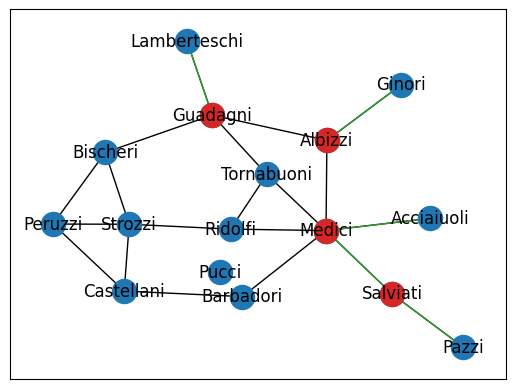

In [173]:
art_points = [x for x in nx.articulation_points(net)]
bridges = [x for x in nx.bridges(net)]
pos = nx.kamada_kawai_layout(net)
# Рисуем всех акторов
nx.draw_networkx_nodes(net, pos)
# Выделяем красным точки сочленения
nx.draw_networkx_nodes(net, pos, nodelist=art_points, node_color="tab:red")
# Рисуем все связи
nx.draw_networkx_edges(net, pos)
# Выделяем зелёным мосты
nx.draw_networkx_edges(net, pos, edgelist=bridges, edge_color="tab:green")
# Рисуем имена акторов
nx.draw_networkx_labels(net, pos, {name: name for name in names})
print(art_points)
print(bridges)

12. Выполнить п. 2–8 для направленной сети из файла krackhardt_friendship.csv (для
чётных вариантов).

12.1 Извлечь социоматрицу, вывести её на экран.

In [174]:
sm = pd.read_csv('data/krackhardt_friendship.csv', skiprows=2, header=None, delimiter=', ', engine='python')
sm

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0,1,0,1,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,1,1,0,0,0,0,0,1,0,0,...,1,0,0,0,1,1,0,0,0,0
4,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,1,0,1,0,1
5,0,1,0,0,0,0,1,0,1,0,...,1,0,0,0,0,1,0,0,0,1
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,1,0,1,0,0,1,1,0,...,1,0,0,0,1,0,0,0,1,0


12.2. Преобразовать социоматрицу в список рёбер. Вывести первые 5 элементов списка рёбер

In [175]:
nx.to_pandas_edgelist(nx.from_pandas_adjacency(sm)).head()

,source,target,weight
0,0,1,1
1,0,3,1
2,0,7,1
3,0,11,1
4,0,15,1


12.3. Присвоить имена столбцам и строкам социоматрицы (имена – первая строка в csv-файле после комментариев).

> В данном случае имён в файле нет.

12.4. С помощью соответствующих функций по полученной социоматрице построить направленную сеть.
Объяснить параметры, передаваемые в функцию.

In [176]:
net = nx.from_pandas_adjacency(sm, create_using=nx.DiGraph)

> Объяснение параметров: в функцию передаётся два параметра: социоматрица, по которой строится сеть и конструктор направленной сети.

12.5. Отобразить сеть с помощью алгоритмов укладки Фрюхтермана–
Рейнгольда и Камада–Каваи. Объяснить, в чём различие между
алгоритмами и укладками.

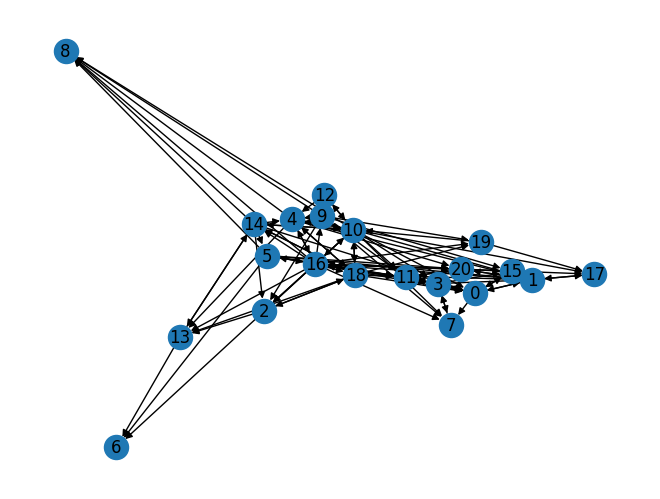

In [177]:
# Отрисовка на основе spring_layout, в котором используется алгоритм Фрюхтермана–Рейнгольда
# (см. исходный код https://networkx.org/documentation/stable/_modules/networkx/drawing/layout.html#spring_layout)
nx.draw_spring(net, with_labels=True)

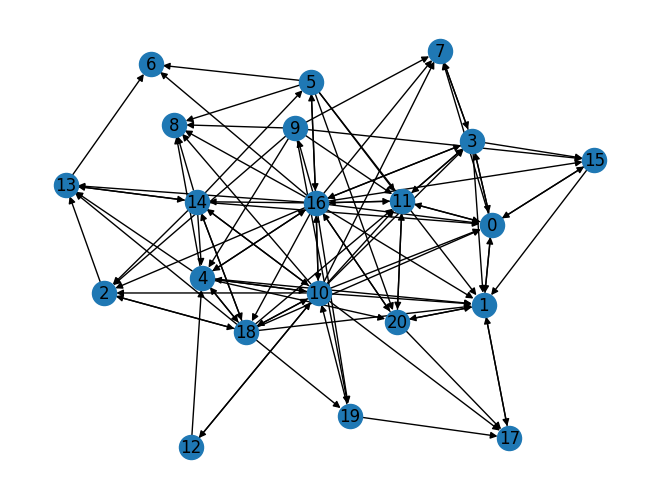

In [178]:
nx.draw_kamada_kawai(net, with_labels=True)

12.6. Вывести «описательную сводку» сети.

In [179]:
print(nx.info(net), '\n')
for i in range(nx.number_of_nodes(net)):
    print(f"Node 0 has the following properties:")
    print(f"In degree: {net.in_degree(i)}")
    print(f"Out degree: {net.out_degree(i)}")
    print(f"Predecessors: {list(net.predecessors(i))}")
    print(f"Successors: {list(net.successors(i))}")
    print("\n")

DiGraph with 21 nodes and 102 edges 

Node 0 has the following properties:
In degree: 8
Out degree: 5
Predecessors: [1, 3, 10, 11, 14, 15, 16, 18]
Successors: [1, 3, 7, 11, 15]


Node 0 has the following properties:
In degree: 10
Out degree: 3
Predecessors: [0, 3, 4, 5, 10, 15, 16, 17, 18, 20]
Successors: [0, 17, 20]


Node 0 has the following properties:
In degree: 5
Out degree: 2
Predecessors: [9, 10, 14, 16, 18]
Successors: [13, 18]


Node 0 has the following properties:
In degree: 5
Out degree: 6
Predecessors: [0, 7, 10, 11, 16]
Successors: [0, 1, 7, 11, 15, 16]


Node 0 has the following properties:
In degree: 6
Out degree: 7
Predecessors: [9, 10, 12, 14, 16, 18]
Successors: [1, 8, 10, 13, 16, 18, 20]


Node 0 has the following properties:
In degree: 2
Out degree: 6
Predecessors: [14, 16]
Successors: [1, 6, 8, 11, 16, 20]


Node 0 has the following properties:
In degree: 3
Out degree: 0
Predecessors: [5, 13, 16]
Successors: []


Node 0 has the following properties:
In degree: 5
Ou

12.7. Вычислить «пятичисловую сводку» сети:

(a) Вычислить размер сети.

In [180]:
net.number_of_nodes()

21

(b) Вычислить плотность сети вручную и с помощью соответствующей функции. Сделать выводы.

Пожалуй, не будем считать ребра вручную...

In [181]:
net.number_of_edges()

102

$\Delta = \frac{L}{A_g^2} = \frac{102}{21\cdot20} = \frac{102}{420} = 0,242857...$

In [182]:
nx.density(net)

0.24285714285714285

> Вывод: если взять двух менеджеров Krackhardt то с вероятностью 24% они будут дружить.

(c) Определить число компонент в сети по графику.
Подтвердить свои догадки с помощью соответствующей функции.
Сделать выводы.

По графику тяжело определить точное количество компонент сильной связности,
однако видно, что 6 и 7 - две отдельных компоненты сильной связности.

In [183]:
nx.number_strongly_connected_components(net)

3

> Вывод: в компании Krackhardt есть два менеджера с номерами 6 и 7,
> которые не дружат ни с кем.

(d) Вычислить диаметр сети. Сделать выводы.

In [184]:
max(nx.diameter(nx.subgraph(net, component)) for component in nx.strongly_connected_components(net))

5

> Вывод: самая длинная из кратчайших цепочка из дружеских связей, соединяющая двух менеджеров, имеет длину 5.

(e) Вычислить коэффициент кластеризации. Сделать выводы.

In [185]:
nx.transitivity(net)

0.27581863979848864

> Вывод: если менеджер $A$ имеет дружескую связь с менеджером $B$,
> а менеджер $B$ с менеджером $C$, то с вероятностью 28% $A$ имеет дружескую связь с $C$.

12.8. Вычислить среднюю степень узлов и дисперсию. Сделать выводы.

In [186]:
avg_deg_in = sum(deg for _, deg in net.in_degree) / net.number_of_nodes()
avg_deg_out = sum(deg for _, deg in net.out_degree) / net.number_of_nodes()
disp_in = sum((deg - avg_deg_in) ** 2 for _, deg in net.in_degree) / net.number_of_nodes()
disp_out = sum((deg - avg_deg_out) ** 2 for _, deg in net.out_degree) / net.number_of_nodes()
print(f"Mean: in={avg_deg_in}, out={avg_deg_out}.")
print(f"Despersion: in={disp_in}, out={disp_out}.")

Mean: in=4.857142857142857, out=4.857142857142857.
Despersion: in=4.6938775510204085, out=19.07482993197279.


> Вывод: в среднем, каждый менеджер имеет дружит 4-5 другими менеджерами,
> причём для входных дружеских связей разброс от этого значения небольшой, а для выходных гораздо больше.

13. Заполнить таблицу для различных мер престижа.

In [187]:
def I_i(n_i, net):
    return [node for node in net.nodes if nx.has_path(net, node, n_i)]

c = {node: [] for node in net.nodes}

for name, val in {n_i: net.in_degree(n_i) / (g - 1) for n_i in net.nodes}.items():
    c[name].append(val)

for n_i in net.nodes:
    I = I_i(n_i, net)
    c[n_i].append(len(I) ** 2 / (g - 1) / sum(nx.shortest_path_length(net, n_j, n_i) for n_j in I))

data = {name: lst for name, lst in c.items() if lst}
df = pd.DataFrame(data=data).T
df.columns = ['P_d', 'P_p']
df

,P_d,P_p
0,0.533333,0.859524
1,0.666667,0.891358
2,0.333333,0.633333
3,0.333333,0.707843
4,0.400000,0.650450
5,0.133333,0.534815
6,0.200000,0.592593
7,0.333333,0.707843
8,0.400000,0.666667
9,0.066667,0.481333


Вывод: самым важным по всем мерам престижа является менеджер с номером 1.


## Выводы

В ходе работы были исследованы две сети:
сеть брачных связей между флорентийскими семьями и сеть дружеских связей между работниками компании Krackhardt.

В ходе исследования были получены результаты:
* единственная флорентийская семья, не имевшая брачных связей с другими - Pucci;
* с вероятностью 17% две флорентийские семьи имели брачную связь;
* каждая семья имела в среднем 2-3 брачных связи с другими;
* Medici - самая важная семья в сети по всем параметрам;
* в компании Krackhardt есть два менеджера, которые не дружат ни с кем - 6 и 7;
* между двумя менеджерами компании Krackhardt есть дружеская связь с вероятностью 24%
* в среднем каждый менеджер дружит с 9-10 коллегами;
* самый важный менеджер имеет номер 1.

Работа выполнялась при помощи языка Python с использованием библиотек Pandas и NetworkX.

В итоге были получены навыки работы с математическими пакетами для моделирования, визуализации и анализа социальных сетей.